# **CIC IoT 2023**

## Data Load & Understanding

### Import Library

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

### Data Load

In [2]:
# Menghubungkan Google Drive dan Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Mengambil dataset
dataset = '/content/gdrive/MyDrive/ciciot2023_dataaftersampling.csv'
df = pd.read_csv(dataset)

Mounted at /content/gdrive


In [3]:
# Menampilkan dataset
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,27.669304,689.9,12.6,90.3,39.116188,39.116188,0.0,0.0,0.0,0.0,...,22.304869,84.7,1.665239e+08,13.5,11.773372,31.603995,5.764931e+02,1.0,244.6,Benign
1,91.378398,57996.0,14.8,61.2,5.994365,5.994365,0.0,0.0,0.0,0.0,...,660.857369,65.8,1.665225e+08,13.5,30.877932,936.184289,4.395679e+05,1.0,244.6,Benign
2,0.465044,1550299.8,6.0,87.6,3642.141552,3642.141552,0.0,0.0,0.0,0.0,...,460.086813,641.2,6.241798e-05,5.5,28.662564,650.661011,3.029826e+05,0.7,38.5,Benign
3,86.902002,1250155.9,11.5,130.6,21.738589,21.738589,0.0,0.0,0.0,0.0,...,443.997983,267.3,2.646551e-02,5.5,24.326006,627.907969,2.655302e+05,0.9,38.5,Benign
4,200.524157,6725.9,7.0,69.5,14.490983,14.490983,0.0,0.0,0.0,0.0,...,30.200387,89.3,1.665164e+08,13.5,13.060905,42.844485,9.666386e+02,1.0,244.6,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104507,253.505288,18713.2,6.5,128.3,0.829886,0.829886,0.0,0.0,0.0,0.0,...,76.415097,114.6,1.841600e-02,5.5,15.146764,108.067266,7.343507e+03,0.9,38.5,Web
104508,0.125199,5134.0,8.2,126.6,147.532878,147.532878,0.0,0.0,0.0,0.0,...,81.167892,295.0,3.377986e-03,5.5,16.973862,114.788734,2.272707e+04,0.9,38.5,Web
104509,74.521378,177308.8,7.1,62.6,85.809469,85.809469,0.0,0.0,0.0,0.0,...,452.880527,179.2,1.668458e+08,13.5,28.296740,641.123945,2.065224e+05,1.0,244.6,Web
104510,203.753195,14663.6,13.7,93.4,64541.743220,64541.743220,0.0,0.0,0.0,0.0,...,124.964346,139.1,1.676387e+08,13.5,18.136489,177.019400,1.571952e+04,1.0,244.6,Web


### Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104512 entries, 0 to 104511
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    104512 non-null  float64
 1   Header_Length    104512 non-null  float64
 2   Protocol Type    104512 non-null  float64
 3   Duration         104512 non-null  float64
 4   Rate             104512 non-null  float64
 5   Srate            104512 non-null  float64
 6   Drate            104512 non-null  float64
 7   fin_flag_number  104512 non-null  float64
 8   syn_flag_number  104512 non-null  float64
 9   rst_flag_number  104512 non-null  float64
 10  psh_flag_number  104512 non-null  float64
 11  ack_flag_number  104512 non-null  float64
 12  ece_flag_number  104512 non-null  float64
 13  cwr_flag_number  104512 non-null  float64
 14  ack_count        104512 non-null  float64
 15  syn_count        104512 non-null  float64
 16  fin_count        104512 non-null  floa

In [5]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,104512.000000,1.045120e+05,104512.000000,104512.000000,1.045120e+05,1.045120e+05,1.045120e+05,104512.000000,104512.000000,104512.000000,...,104512.000000,104512.000000,104512.000000,1.045120e+05,104512.000000,104512.000000,104512.000000,1.045120e+05,104512.000000,104512.000000
mean,177.477265,4.332109e+05,11.750834,86.809103,4.565778e+03,4.565778e+03,7.163225e-07,0.014659,0.079244,0.028150,...,368.680230,200.976815,369.135569,8.340168e+07,9.500007,22.423179,283.966381,2.073275e+05,0.563073,141.554238
std,1879.441241,1.138896e+06,11.070651,39.112825,6.144972e+04,6.144972e+04,1.393649e-04,0.120183,0.270121,0.165402,...,521.855798,378.184680,525.861829,6.518510e+07,3.128539,14.872108,534.996259,8.074139e+05,0.436877,80.575735
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,6.914139e-07,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.035681,1.080000e+02,6.000000,64.000000,4.811034e+00,4.811034e+00,0.000000e+00,0.000000,0.000000,0.000000,...,57.752302,0.000000,57.500000,2.319816e-02,5.500000,10.737735,0.000000,0.000000e+00,0.000000,38.500000
50%,3.987052,1.092775e+04,7.100000,65.680000,2.986840e+01,2.986840e+01,0.000000e+00,0.000000,0.000000,0.000000,...,123.291924,39.361634,119.700000,8.314962e+07,9.500000,15.579501,55.454842,2.536238e+03,0.800000,141.550000
75%,48.608257,1.402605e+05,13.700000,99.062500,1.176025e+02,1.176025e+02,0.000000e+00,0.000000,0.000000,0.000000,...,554.000000,182.821823,554.000000,1.665181e+08,13.500000,33.286634,257.574905,5.129033e+04,1.000000,244.600000
max,99685.656389,9.834752e+06,47.000000,255.000000,6.291456e+06,6.291456e+06,3.356606e-02,1.000000,1.000000,1.000000,...,11650.000000,6438.679484,11650.000000,1.676394e+08,15.000000,152.643375,9105.667850,4.625804e+07,1.000000,244.600000


In [6]:
df.describe(include='object')

,label
count,104512
unique,8
top,Benign
freq,13064


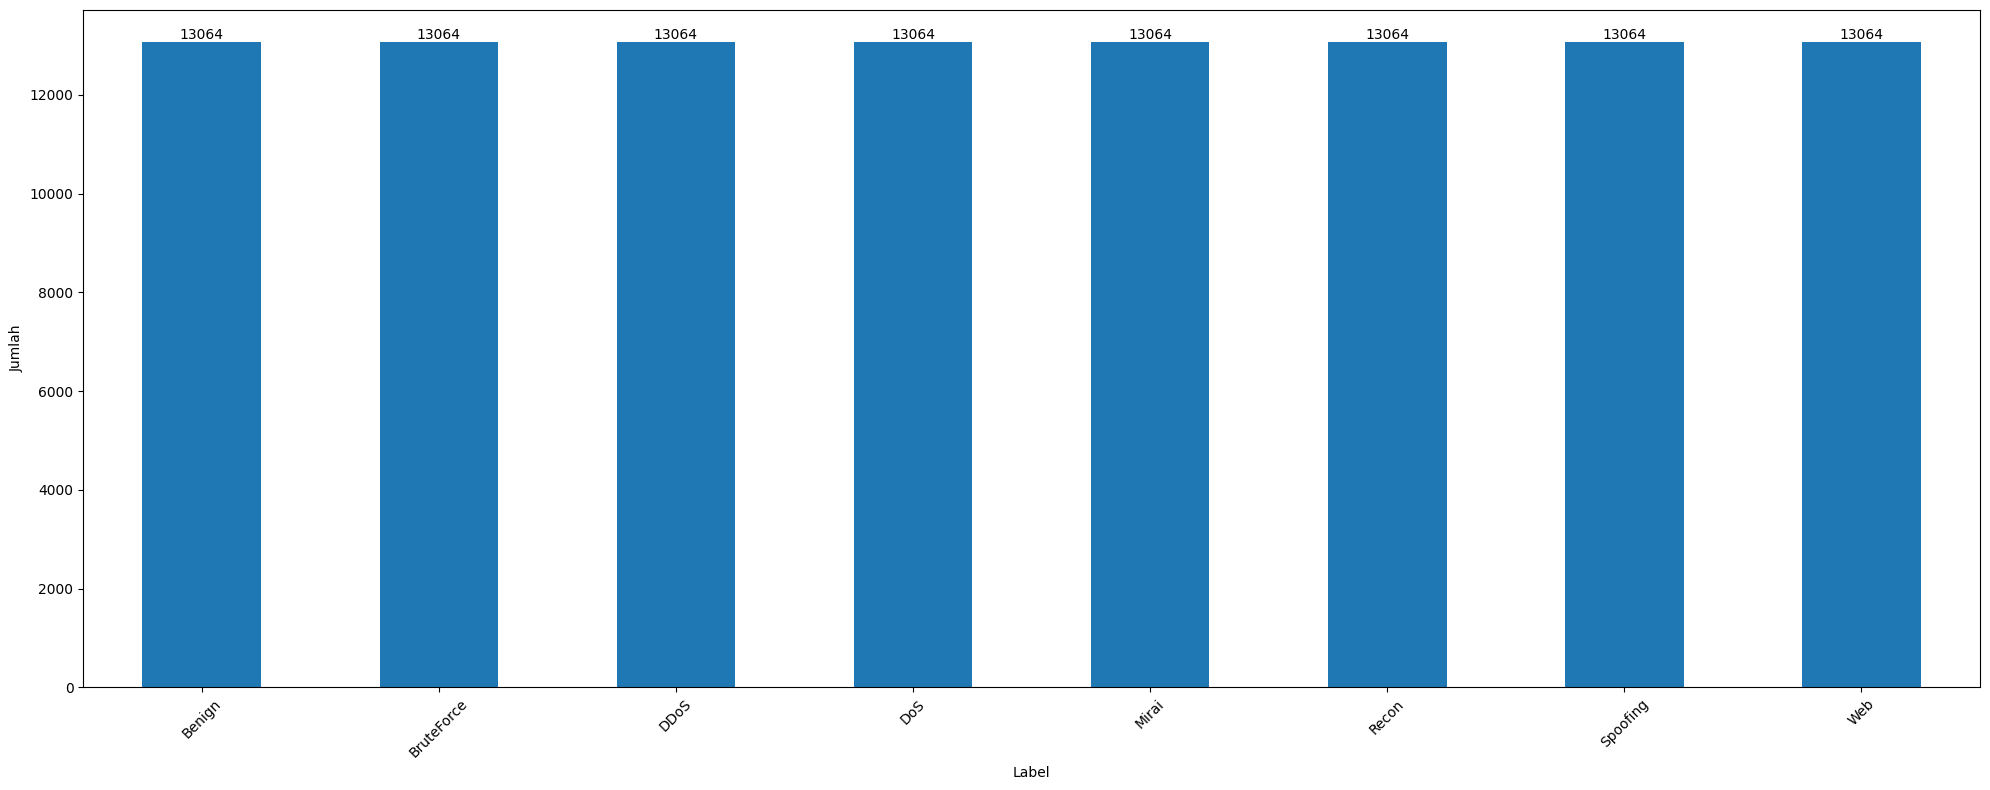

In [7]:
# Menghitung jumlah masing-masing label
label_counts = df['label'].value_counts()

# Mengurutkan label berdasarkan jumlahnya dari terbanyak ke terkecil
label_counts = label_counts.sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(20, 8))
label_counts.plot(kind='bar')

# Menambahkan label sumbu x (label) dan sumbu y (jumlah)
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menambahkan teks dengan jumlah masing-masing pada setiap bar
for i, v in enumerate(label_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Menampilkan grafik
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca jika terlalu banyak
plt.tight_layout()  # Untuk mengatur layout agar tidak tumpang tindih
plt.show()

## Data Pre-Processing

### Feature Selection Dengan Wrapper Based - Decision Tree

In [8]:
# Memisahkan fitur dan target
X = df.drop(columns=['label'])
y = df['label']

In [9]:
# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(random_state=42)  # Anda dapat menyesuaikan parameter sesuai kebutuhan

# Inisialisasi RFE dengan model Decision Tree
rfe = RFE(model, n_features_to_select=10)  # Ganti 'n_features_to_select' sesuai dengan jumlah fitur yang ingin dipilih

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model RFE pada data pelatihan
X_train_new = rfe.fit_transform(X_train, y_train)

# Mendapatkan indeks fitur terbaik
selected_feature_indices = rfe.support_

# Menampilkan fitur yang terpilih
selected_feature_names = X.columns[selected_feature_indices]
print("Fitur Terpilih:")
print(selected_feature_names)

# DataFrame baru dengan fitur terpilih
X_filtered = X[selected_feature_names]

Fitur Terpilih:
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Srate', 'fin_count',
       'urg_count', 'rst_count', 'Min', 'IAT', 'Magnitue'],
      dtype='object')


In [10]:
X_filtered

,flow_duration,Header_Length,Protocol Type,Srate,fin_count,urg_count,rst_count,Min,IAT,Magnitue
0,27.669304,689.9,12.6,39.116188,0.0,1.9,2.9,46.0,1.665239e+08,11.773372
1,91.378398,57996.0,14.8,5.994365,0.0,165.4,337.9,50.0,1.665225e+08,30.877932
2,0.465044,1550299.8,6.0,3642.141552,0.0,273.1,1693.7,94.0,6.241798e-05,28.662564
3,86.902002,1250155.9,11.5,21.738589,0.0,48.9,1186.4,68.0,2.646551e-02,24.326006
4,200.524157,6725.9,7.0,14.490983,0.0,30.1,49.1,54.0,1.665164e+08,13.060905
...,...,...,...,...,...,...,...,...,...,...
104507,253.505288,18713.2,6.5,0.829886,0.0,20.6,43.7,58.8,1.841600e-02,15.146764
104508,0.125199,5134.0,8.2,147.532878,0.0,6.8,15.4,79.5,3.377986e-03,16.973862
104509,74.521378,177308.8,7.1,85.809469,0.0,105.6,249.2,64.4,1.668458e+08,28.296740
104510,203.753195,14663.6,13.7,64541.743220,0.0,51.2,103.5,60.0,1.676387e+08,18.136489


In [12]:
# Menambahkan fitur target dari y_resampled ke dalam pca_df
wb_combined_df = pd.concat([X_filtered, y], axis = 1)

# Menampilkan DataFrame hasilnya
print("\nDataframe Setelah Menambahkan Fitur Target:")
wb_combined_df


Dataframe Setelah Menambahkan Fitur Target:


,flow_duration,Header_Length,Protocol Type,Srate,fin_count,urg_count,rst_count,Min,IAT,Magnitue,label
0,27.669304,689.9,12.6,39.116188,0.0,1.9,2.9,46.0,1.665239e+08,11.773372,Benign
1,91.378398,57996.0,14.8,5.994365,0.0,165.4,337.9,50.0,1.665225e+08,30.877932,Benign
2,0.465044,1550299.8,6.0,3642.141552,0.0,273.1,1693.7,94.0,6.241798e-05,28.662564,Benign
3,86.902002,1250155.9,11.5,21.738589,0.0,48.9,1186.4,68.0,2.646551e-02,24.326006,Benign
4,200.524157,6725.9,7.0,14.490983,0.0,30.1,49.1,54.0,1.665164e+08,13.060905,Benign
...,...,...,...,...,...,...,...,...,...,...,...
104507,253.505288,18713.2,6.5,0.829886,0.0,20.6,43.7,58.8,1.841600e-02,15.146764,Web
104508,0.125199,5134.0,8.2,147.532878,0.0,6.8,15.4,79.5,3.377986e-03,16.973862,Web
104509,74.521378,177308.8,7.1,85.809469,0.0,105.6,249.2,64.4,1.668458e+08,28.296740,Web
104510,203.753195,14663.6,13.7,64541.743220,0.0,51.2,103.5,60.0,1.676387e+08,18.136489,Web


## Modelling & Evaluation

### Modelling (Decision Tree)

In [13]:
# Memisahkan fitur dan target
X = wb_combined_df.drop(columns=['label'])
y = wb_combined_df['label']

In [14]:
# Membagi data menjadi data pelatihan dan pengujian
X = X
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Membangun model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Melatih model pada data pelatihan
decision_tree.fit(X_train, y_train)

# Memprediksi kelas pada data pengujian
y_pred = decision_tree.predict(X_test)

### Evaluation

In [16]:
# Mengukur performa model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)

# Menampilkan confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Akurasi Model: 0.8732239391474907
Classification report:
               precision    recall  f1-score   support

      Benign       0.84      0.83      0.83      2645
  BruteForce       0.78      0.77      0.78      2576
        DDoS       1.00      1.00      1.00      2677
         DoS       1.00      1.00      1.00      2635
       Mirai       1.00      1.00      1.00      2682
       Recon       0.79      0.79      0.79      2576
    Spoofing       0.79      0.81      0.80      2515
         Web       0.78      0.77      0.77      2597

    accuracy                           0.87     20903
   macro avg       0.87      0.87      0.87     20903
weighted avg       0.87      0.87      0.87     20903

Confusion Matrix:
 [[2195  107    0    2    0  135  160   46]
 [ 102 1992    0    2    0  153  110  217]
 [   0    0 2669    1    1    3    1    2]
 [   0    0    1 2632    0    1    1    0]
 [   0    0    0    0 2680    1    0    1]
 [ 129  141    2    1    1 2045  111  146]
 [ 136  101   

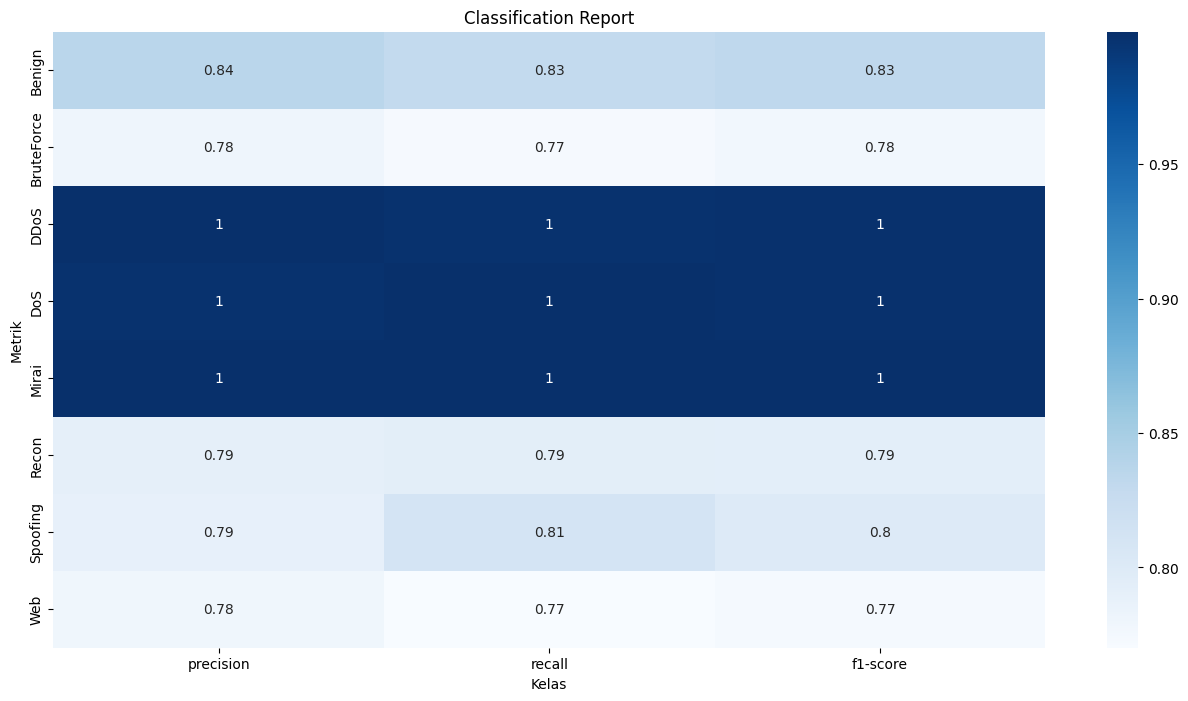

In [17]:
# Prediksi model
y_pred = decision_tree.predict(X_test)

# Laporan Klasifikasi
class_report = classification_report(y_test, y_pred, target_names=[str(label) for label in np.unique(y)], output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()

# Visualisasi Classification Report
plt.figure(figsize=(16, 8))
sns.heatmap(df_class_report.iloc[:-3, :-1], annot=True, cmap="Blues")
plt.title("Classification Report")
plt.xlabel("Kelas")
plt.ylabel("Metrik")
plt.show()

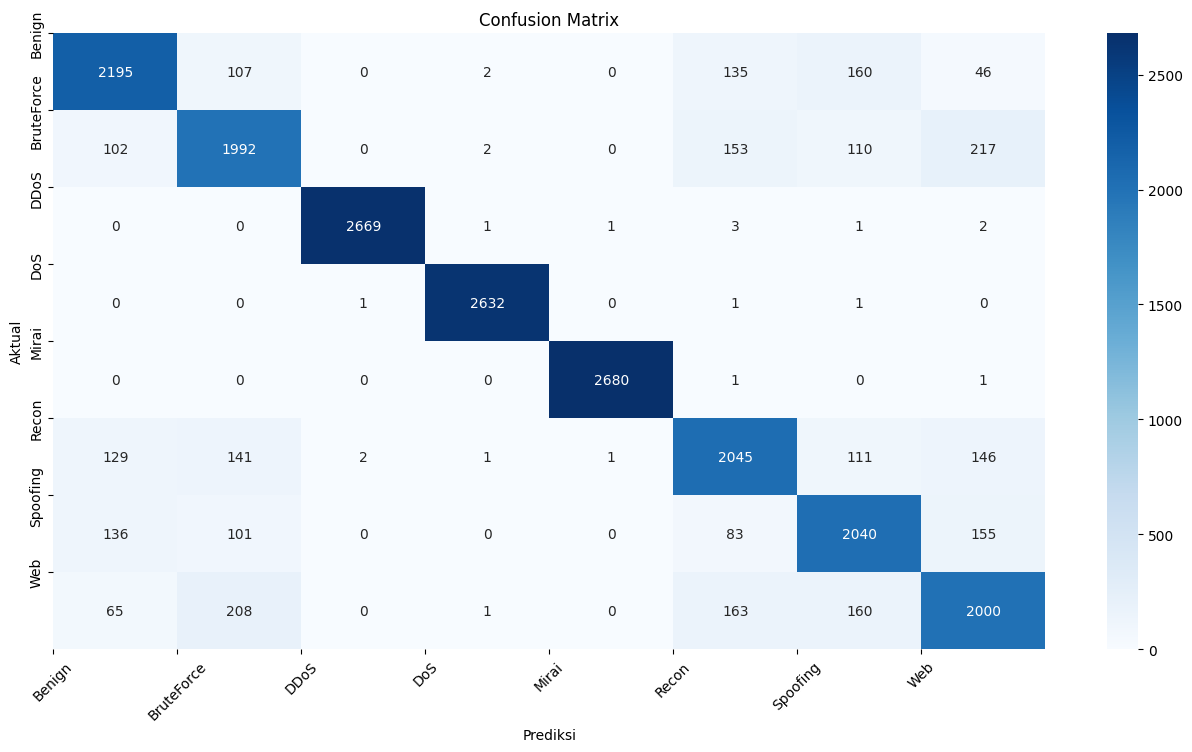

In [18]:
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Nama kelas yang digunakan
class_names = np.unique(y)

# Visualisasi Confusion Matrix
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")

# Menambahkan nama kelas sebagai label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()